# Explore here

In [98]:
%pip install -r ../requirements.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sqlalchemy import create_engine

from pickle import dump


import sqlite3

In [100]:
df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [101]:
data_X = df[["Latitude", "Longitude", "MedInc"]]
data_X.head()

,Latitude,Longitude,MedInc
0,37.88,-122.23,8.3252
1,37.86,-122.22,8.3014
2,37.85,-122.24,7.2574
3,37.85,-122.25,5.6431
4,37.85,-122.25,3.8462


In [102]:
Train_X, Test_X = train_test_split(data_X, test_size= 0.2, random_state=42)

In [103]:
Train_X.shape

(16512, 3)

In [104]:
Test_X.shape

(4128, 3)

In [105]:
data_norm = preprocessing.scale(data_X, axis= 0)

In [106]:
pca_model = PCA(n_components=2)

In [107]:
data_vis = pca_model.fit_transform(data_X)

In [108]:
data_vis

array([[ 3.26583206,  4.61584546],
       [ 3.24540791,  4.59173526],
       [ 3.29602589,  3.5539484 ],
       ...,
       [ 3.99340033, -2.10623045],
       [ 4.05436184, -1.93100809],
       [ 3.93389379, -1.41729769]])

In [109]:
data_vis.shape

(20640, 2)

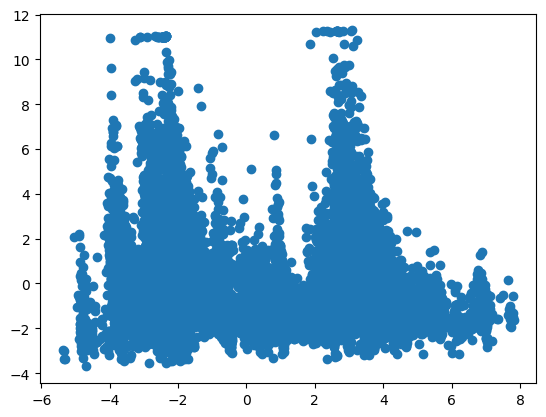

In [110]:
plt.scatter(data_vis[:,0], data_vis[:,1])

In [111]:
clustering_model = KMeans(n_clusters=6)

In [112]:
clustering_model.fit(Train_X)

KMeans(n_clusters=6)

In [113]:
Train_X["Target"]=clustering_model.labels_
Train_X.head()

,Latitude,Longitude,MedInc,Target
14196,32.71,-117.03,3.2596,1
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,4
14265,32.69,-117.11,1.9425,1
2271,36.78,-119.80,3.5542,4


In [114]:
data_norm = preprocessing.scale(Train_X.drop("Target", axis=1), axis= 0)

In [115]:
pca_model = PCA(n_components=2)

In [116]:
data_vis = pca_model.fit_transform(data_norm)

In [117]:
print(data_vis)

[[-1.8539089  -0.405118  ]
 [-1.11876939 -0.07832147]
 [-0.01649009  0.1894366 ]
 ...
 [-0.93432834 -0.53096182]
 [ 1.43351093  1.04335752]
 [ 1.733307   -0.58433896]]


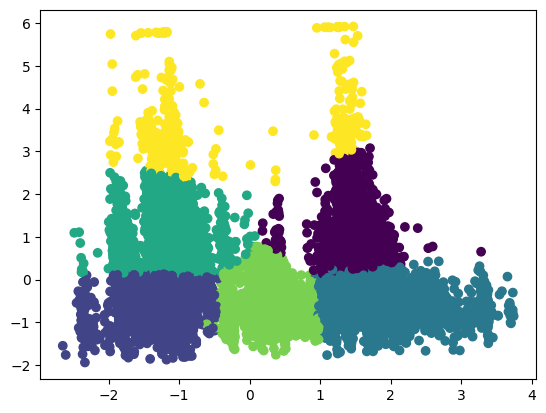

In [118]:
plt.scatter(data_vis[:,0], data_vis[:,1], c=Train_X["Target"])

In [119]:
Test_X.head()

,Latitude,Longitude,MedInc
20046,36.06,-119.01,1.6812
3024,35.14,-119.46,2.5313
15663,37.80,-122.44,3.4801
20484,34.28,-118.72,5.7376
9814,36.62,-121.93,3.7250


In [120]:
Train_X.head()

,Latitude,Longitude,MedInc,Target
14196,32.71,-117.03,3.2596,1
8267,33.77,-118.16,3.8125,1
17445,34.66,-120.48,4.1563,4
14265,32.69,-117.11,1.9425,1
2271,36.78,-119.80,3.5542,4


In [121]:
Test_X.head()

,Latitude,Longitude,MedInc
20046,36.06,-119.01,1.6812
3024,35.14,-119.46,2.5313
15663,37.80,-122.44,3.4801
20484,34.28,-118.72,5.7376
9814,36.62,-121.93,3.7250


In [124]:
test_labels = clustering_model.predict(Test_X)

In [132]:
Test_X["Target"] = test_labels

In [133]:
Test_X.head()

,Latitude,Longitude,MedInc,Target
20046,36.06,-119.01,1.6812,4
3024,35.14,-119.46,2.5313,4
15663,37.80,-122.44,3.4801,2
20484,34.28,-118.72,5.7376,3
9814,36.62,-121.93,3.7250,2
